In [1]:
import torch

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

In [9]:
def use_svg_display():
    """ Use svg format to display a plot in jupyter """
    backend_inline.set_matplotlib_formats('svg')

In [12]:
def set_figsize(figsize=(3.5,2.5)): 
    # Set figsize for matplotlib
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize

In [21]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    # Set axes for matplotlib
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [22]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None, ylim=None,
        xscale='linear', yscale='linear',fmts=('-','m--','g-','r:'),
        figsize=(3.5,2.5), axes=None):

        """ Plot the data points """

        def has_one_axis(X):
            return (hasattr(X, 'ndim') and X.ndim==1 or isinstance(X, list)
            and not hasattr(X[0], "__len__"))
        # Above function returns True if X (Tensor or list) has 1 axis

        if has_one_axis(X): X=[X]
        # add another axes above

        if Y is None:
            X,Y =[[]]*len(X), X
        elif has_one_axis(Y):
            Y=[Y]
        
        if len(X)!=len(Y):
            # Do broadcasting
            X=X*len(Y)
        
        set_figsize(figsize)
        if axes is None:
            axes=plt.gca()
        axes.cla()
        for x,y,fmt in zip(X, Y, fmts):
            axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
        set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

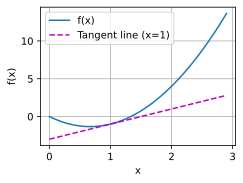

In [23]:
""" Test Above functions """
x=np.arange(0,3,0.1)

def f(x):
    return 3*x**2 - 4*x

plot(x, [f(x), 2*x-3], 'x','f(x)',legend=['f(x)', 'Tangent line (x=1)'])

## Probability Distribution Plots

In [24]:
from torch.distributions.multinomial import Multinomial
import random

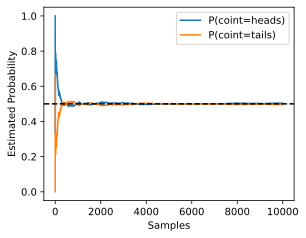

In [25]:
fair_probs=torch.tensor([0.5,0.5])
counts = Multinomial(1, fair_probs).sample((10000,))
# Cumulaltive sum
cum_counts = counts.cumsum(dim=0)

estimates = cum_counts/cum_counts.sum(dim=1, keepdims=True)

#Plots

set_figsize((4.5,3.5))
plt.plot(estimates[:,0], label=("P(coint=heads)"))
plt.plot(estimates[:,1], label=("P(coint=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated Probability')
plt.legend();